
<h1 align="center"><font size="5"><h2>Telecom Churn Prediction</h2></font></h1>

# Table of Contents
- [About the Dataset](#0)
- [Importing Dataset](#1)
- [Data Wrangling](#2)
- [EDA](#3)
- [Data Preprocessing](#4)
- [Model Development](#5)
- [Model Evaluation](#6)
- [Model Refinement](#7)
<br><br><br><br>
<hr>

<a id = 0 ></a>
# About The Dataset

The original source of the data is from IBM Sample Dataset and the latest data can be gathered from [https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).


The dataset to be used here is the Telco Churn which was gathered from the Kaggle at [https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)



The Telco customer churn data contains information 
This Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. The **Telco-Customer-Churn.csv** dataset includes the following fields:

| Variable | Description |
| --- | --- |
| customerID | Unique identifier for each customer |
| gender | Customer's gender (Male or Female) |
| SeniorCitizen | Whether the customer is a senior citizen or not (1 or 0) |
| Partner | Whether the customer has a partner or not (Yes or No) |
| Dependents | Whether the customer has dependents or not (Yes or No) |
| tenure | Number of months the customer has been with the company |
| PhoneService | Whether the customer has phone service or not (Yes or No) |
| MultipleLines | Whether the customer has multiple phone lines or not (Yes, No, or No phone service) |
| InternetService | Customer's internet service provider (DSL, Fiber optic, or No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, or No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, or No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, or No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, or No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, or No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, or No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, or Two year) |
| PaperlessBilling | Whether the customer has opted for paperless billing or not (Yes or No) |
| PaymentMethod | The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer on a monthly basis |
| TotalCharges | The total amount charged to the customer over their tenure with the company |
| Churn | Whether the customer has churned or not (Yes or No) |



We will require the following libraries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.tree import plot_tree
# Surpressing warnings:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

<hr>

<a id = 1></a>
# Importing the Data Set

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr>


<a id = 2></a>
# Data Wrangling


In [4]:
df.drop(labels=['customerID'], axis=1, inplace=True)

In [5]:
df.shape

(7043, 20)

In [6]:
# check for missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#Converting Total charges to numeric format
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Total charges has 11 rows with null values so we will drop them
df.dropna(inplace = True)
df.info()

# impute missing values in 'TotalCharges' column using mean or median
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [11]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


<hr>


<a id = 3></a>
# Exploratory Data Analysis (EDA)

Here we will explore the data and try to find some insights from the data. We will try to answer some of the questions that we have in mind while exploring the data.

Text(0, 0.5, 'Churn Status')

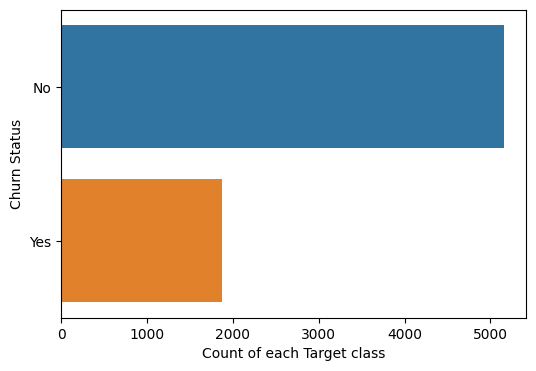

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(y = df.Churn)
plt.xlabel("Count of each Target class")
plt.ylabel("Churn Status")

In [13]:
gd = df.groupby(['gender', 'Churn']).size().reset_index(name='count')
gd

,gender,Churn,count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


In [14]:
dff = pd.pivot_table(gd, values='count', index=['gender'], columns=['Churn'])
dff

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


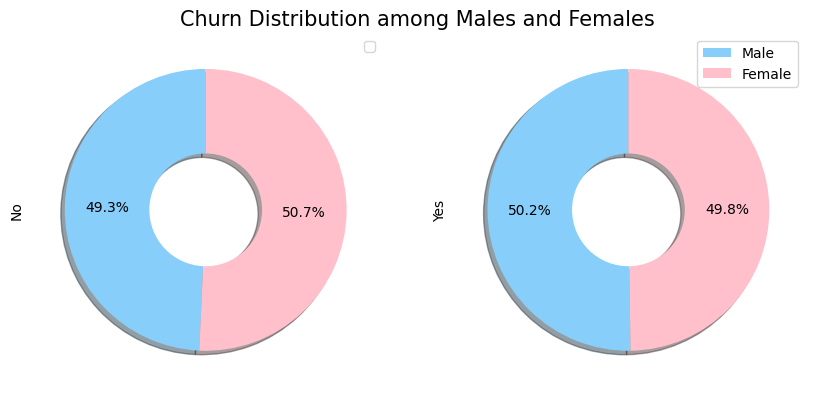

In [15]:
dff.plot(kind='pie', subplots=True, figsize=(10, 6), 
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=0.7, wedgeprops={'width' : 0.6},
                            colors=['lightskyblue','pink']
                            )
# plt.gca().set_aspect('equal')
plt.title('Churn Distribution among Males and Females', x= - 0.1, fontsize=15)
plt.legend(set(dff.index), loc='upper right')
plt.show()


Here we can see that the distribution of churned is almost equal to the non-churned among male and female cutomers.

In [16]:
gdd = df.groupby(['PaymentMethod']).size().reset_index(name='count')
gdd

,PaymentMethod,count
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


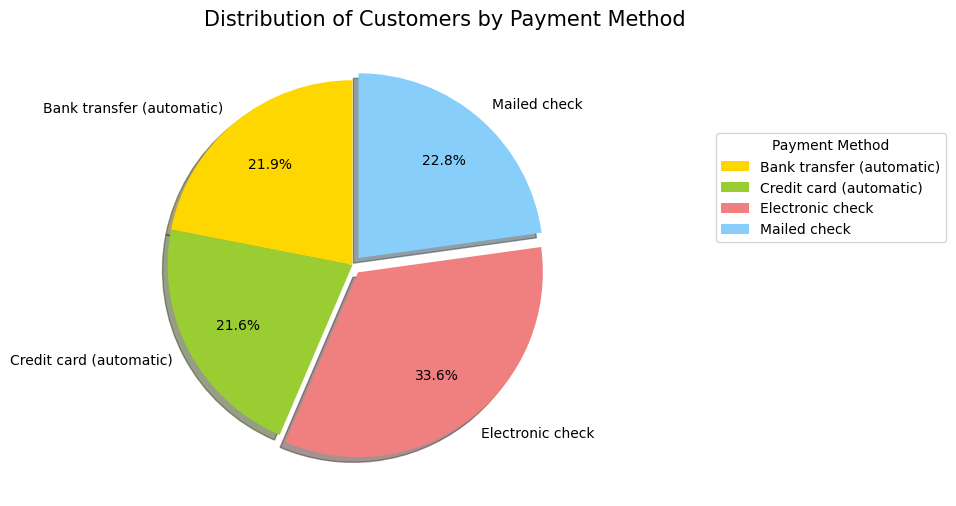

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
ax.pie(gdd['count'], colors=colors, labels=gdd['PaymentMethod'], autopct='%1.1f%%', shadow=True,
        startangle=90, explode=[0,0,0.05,0.05], pctdistance=0.7)
ax.set_title('Distribution of Customers by Payment Method', x=0.7, fontsize=15)
ax.legend(title='Payment Method', bbox_to_anchor=(0.6, 0, 1.2, 0.8))
plt.show()


In [18]:
# pie chart for distribution of customers by churn or not churn accordng to their payment method
gdd = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
gdd[gdd['Churn'] == 'Yes'].sort_values(by='count', ascending=False)

,PaymentMethod,Churn,count
5,Electronic check,Yes,1071
7,Mailed check,Yes,308
1,Bank transfer (automatic),Yes,258
3,Credit card (automatic),Yes,232


Here we can see that most of the customers who have opted for Electronic check and Mailed Check payment method are more likely to churn which is not the case for Bank Transfer and Credit Card payment method.

In [19]:
fig = px.histogram(df, x="InternetService", color="Churn", barmode="stack")
fig.update_layout(title={
    'text': "<b>Proportion of Customer Churn for Different Internet Services</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})                                                                                     
fig.show()

In [20]:
fig = px.histogram(df, x="Contract", color="Churn", barmode="stack")
fig.update_layout(title={
    'text': "<b>Proportion of Customer Churn for Different Contract Types</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

In [21]:
counts = df.groupby(['gender', 'Churn']).size().reset_index(name='count')
fig = px.sunburst(counts, path=['gender', 'Churn'], values='count', color='Churn')
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(title={
    'text': "<b>Gender-wise Distribution of Customer Churn</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})

In [22]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
counts['SeniorCitizen'] = counts['SeniorCitizen'].replace({0: 'Non-Senior', 1: 'Senior'})
fig = px.sunburst(counts, path=['SeniorCitizen', 'Churn'], values='count', color='Churn')
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(title={
    'text': "<b>Seniority-wise Distribution of Customer Churn</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

In [23]:
def graphss(dataframe, ncol):
    fig, axs = plt.subplots(len(ncol), 1, figsize=(10, 10))
    
    for i, col in enumerate(ncol):
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Density')
        sns.kdeplot(dataframe[col], fill=True, ax=axs[i])
    
    plt.tight_layout()
    plt.show()


### Density distribution of different features in the dataset

In this line of code, we will plot the density distribution of different features in the dataset. This will help us to understand the distribution of the data.

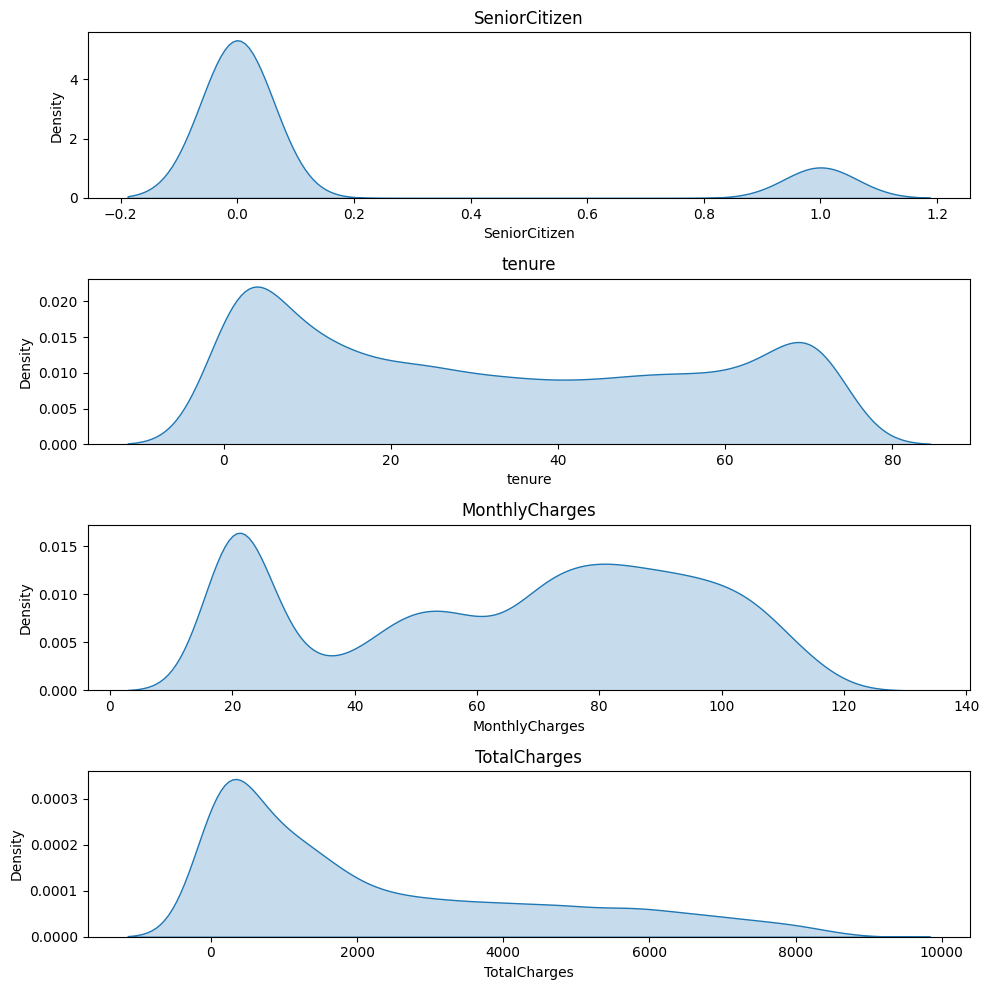

In [24]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
graphss(df, num_cols)

In [25]:
fig = px.box(df, x="Churn", y="tenure")
fig.update_layout(title={
    'text': "<b>Distribution of Tenure for Churned and Non-Churned Customers</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

In [26]:
df['total'] = np.zeros(df.shape[0], dtype=int)

In [27]:
gd1= df[['gender','tenure','total']].groupby(['gender', 'tenure']).count()
gd1

total
gender tenure       
Female 1         284
       2         130
       3         101
       4          88
       5          66
...              ...
Male   68         52
       69         55
       70         57
       71         86
       72        185

[144 rows x 1 columns]

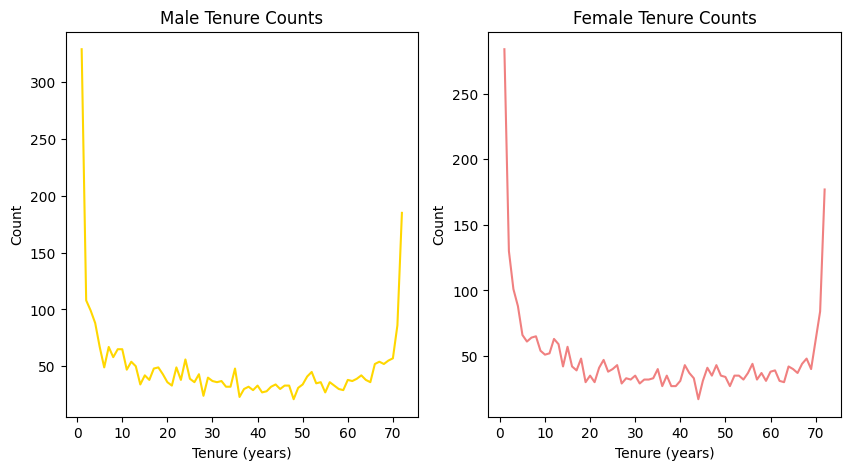

In [28]:
md = gd1.loc['Male']
fd = gd1.loc['Female']
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(md.index, md.total.values, color='gold')
ax[0].set_title('Male Tenure Counts')
ax[0].set_xlabel('Tenure (years)')
ax[0].set_ylabel('Count')

ax[1].plot(fd.index, fd.total.values, color='lightcoral')
ax[1].set_title('Female Tenure Counts')
ax[1].set_xlabel('Tenure (years)')
ax[1].set_ylabel('Count')

plt.show()


In [29]:
df.drop('total', axis=1, inplace=True)

In [30]:
#dividing the dataframe into categories and numeric categories
df_numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
df_categorical =  df.drop(labels=['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)     
df_corr = df_numeric.corr()

fig = px.imshow(df_corr, color_continuous_scale='cividis',
                labels={'x': 'Attributes', 'y': 'Attributes', 'color': 'Correlation'},
                width=800, height=800, 
                x= df_corr.columns, y=df_corr.columns)

annotations = []
for i, row in enumerate(df_corr.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x = df_corr.columns[j], y = df_corr.columns[i],
                text = f'{value:.2f}',
                showarrow = False,
                font = dict(color = 'white', size = 12),
            )
        )

fig.update_layout(
    title={
        'text': "<b>Numerical Features Correlation Heatmap</b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    annotations=annotations
)

fig.show()

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# create an empty dataframe to store correlation coefficients
corr_matrix = pd.DataFrame(columns=df_categorical.columns, index=df_categorical.columns)

# calculate correlation coefficients using Cramer's V
for i in df_categorical.columns:
    for j in df_categorical.columns:
        corr_matrix.loc[i, j] = cramers_v(df_categorical[i], df_categorical[j])
        
fig = px.imshow(corr_matrix, color_continuous_scale='Rdbu',
                labels={'x': 'Attributes', 'y': 'Attributes', 'color': 'Correlation'}, width=800, height=800)
fig.update_layout(title={
    'text': "<b>Categorical Features Correlation Heatmap</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

In [32]:
fig = px.scatter(df, x="tenure", y="MonthlyCharges", color="Churn", opacity=0.8)
fig.update_layout(title={
    'text': "<b>Relationship between Tenure and Monthly Charges with Churn</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

In [33]:
fig = px.scatter(df, x="tenure", y="TotalCharges", color="Churn", opacity=0.8)
fig.update_layout(title={
    'text': "<b>Relationship between Tenure and Total Charges with Churn</b>",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top',
})
fig.show()

<hr>


<a id = 4></a>
<h1>Data Preprocessing</h1>

In [34]:
#converting all variables to numeric format
df_num = df.copy()
cols = ['Partner','Dependents','PhoneService','DeviceProtection','TechSupport','StreamingTV',
        'StreamingMovies','OnlineSecurity','OnlineBackup','MultipleLines','InternetService', 'Contract', 'PaymentMethod']
df_num = pd.get_dummies(df_num, columns=cols)
df_num['Churn'].replace({'No':0, 'Yes':1}, inplace = True)
df_num['PaperlessBilling'].replace({'No':0, 'Yes':1}, inplace = True)
df_num['gender'].replace({'Female':0, 'Male':1}, inplace = True)
df_num.head()


,gender,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,29.85,29.85,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,34,0,56.95,1889.50,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,2,1,53.85,108.15,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,45,0,42.30,1840.75,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,2,1,70.70,151.65,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0


In [35]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

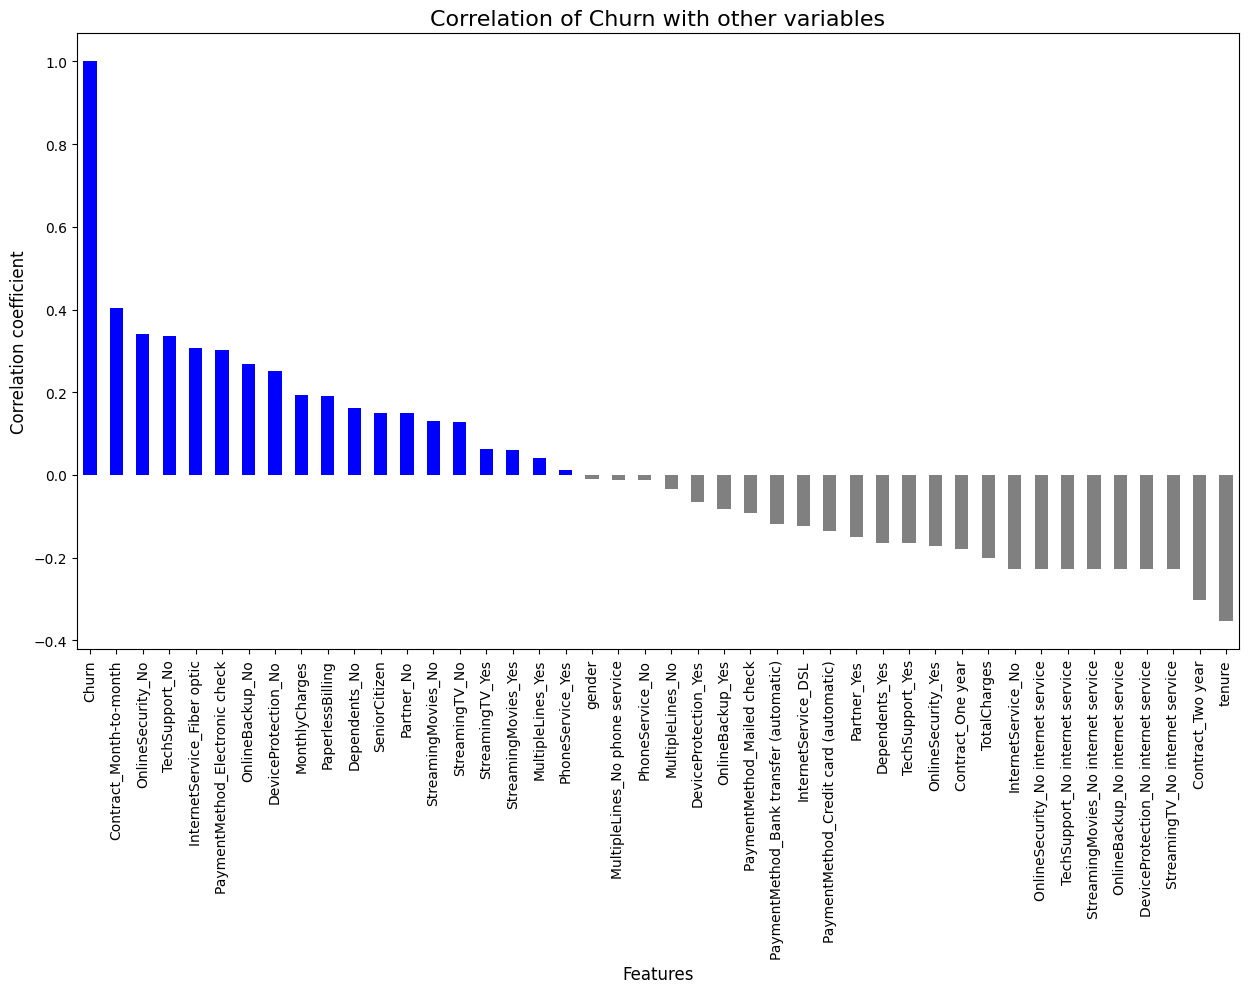

In [36]:
plt.figure(figsize=(15,8))
crr = df_num.corr()['Churn'].sort_values(ascending=False)
crr.plot(kind='bar', color=['gray' if x < 0 else 'blue' for x in crr])

plt.title('Correlation of Churn with other variables', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation coefficient', fontsize=12)
plt.show()


In [37]:
for column in df_num.columns:
    df_num[column] = (df_num[column] - df_num[column].min()) / (df_num[column].max() - df_num[column].min())


In [38]:
X = df_num.drop('Churn', axis=1)
y = df_num['Churn']

In [39]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(y_train.value_counts(),'\n',y_test.value_counts()) 

0.0    3863
1.0    1411
Name: Churn, dtype: int64 
 0.0    1300
1.0     458
Name: Churn, dtype: int64


<hr>


<a id = 5></a>
# Model Development

In [41]:
# Train and evaluate a logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# print("Logistic Regression:")
# print(classification_report(y_test, y_pred_lr))
# print(confusion_matrix(y_test, y_pred_lr))

In [42]:
# Train and evaluate a decision tree model
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
# print("Decision Tree:")
# print(classification_report(y_test, y_pred_dt))
# print(confusion_matrix(y_test, y_pred_dt))

In [43]:
# Train and evaluate a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# print("Random Forest:")
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))

In [44]:
# Train and evaluate a support vector machine model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
# print("Support Vector Machine:")
# print(classification_report(y_test, y_pred_svc))
# print(confusion_matrix(y_test, y_pred_svc))


In [45]:
# Train and evaluate an XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
# print("XGBoost:")
# print(classification_report(y_test, y_pred_xgb))
# print(confusion_matrix(y_test, y_pred_xgb))

In [46]:
# Train and evaluate an AdaBoost model
tr= DecisionTreeClassifier(max_depth=7)
adb = AdaBoostClassifier(estimator=tr, n_estimators=200, learning_rate=0.1)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
# print("AdaBoost:")
# print(classification_report(y_test, y_pred_adb))
# print(confusion_matrix(y_test, y_pred_adb))

<hr>


<a id = 6></a>
# Model Evaluation 

In [47]:
def get_df(models,model_names):
    train_acc = []
    test_acc = []
    roc_auc = []
    precision = []
    recall = []
    f1 = []

    for model in models:
        # Train accuracy
        train_score = model.score(X_train, y_train)
        train_acc.append(train_score)
        
        # Test accuracy
        test_score = model.score(X_test, y_test)
        test_acc.append(test_score)
        
        # ROC AUC
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc_score = auc(fpr, tpr)
        roc_auc.append(roc_auc_score)
        
        # Classification report
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision.append(report['1.0']['precision'])
        recall.append(report['1.0']['recall'])
        f1.append(report['1.0']['f1-score'])

    # Creating a DataFrame with the model performance data
    model_performance = pd.DataFrame({'Model': model_names,
                                    'Train Accuracy': train_acc,
                                    'Test Accuracy': test_acc,
                                    'ROC Area': roc_auc,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1-score': f1,})
    model_performance.set_index('Model', inplace=True)
    return model_performance


In [48]:
models = [lr, dt, rf, svc, xgb, adb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'AdaBoost']
model_performance = get_df(models,model_names)
model_performance.head(6)


,Train Accuracy,Test Accuracy,ROC Area,Precision,Recall,F1-score
Model,,,,,,
Logistic Regression,0.805840,0.791240,0.834101,0.618799,0.517467,0.563615
Decision Tree,0.831248,0.776451,0.801241,0.576832,0.532751,0.553916
Random Forest,0.998294,0.781001,0.809002,0.602817,0.467249,0.526445
SVM,0.818733,0.788965,0.790128,0.625360,0.473799,0.539130
XGBoost,0.947857,0.777588,0.811657,0.587927,0.489083,0.533969
AdaBoost,0.998294,0.759386,0.787131,0.544081,0.471616,0.505263


In [49]:
def plot_confusion_matrix(y, y_predict, ax, t):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, ax=ax, cmap='tab20c', fmt=',d').set_title(t, fontsize=15,weight='bold') 
    ax.set_xlabel('Predicted labels', fontsize=12)
    ax.set_ylabel('True labels', fontsize=12)
    ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
    ax.yaxis.set_ticklabels(['No Churn', 'Churn'])


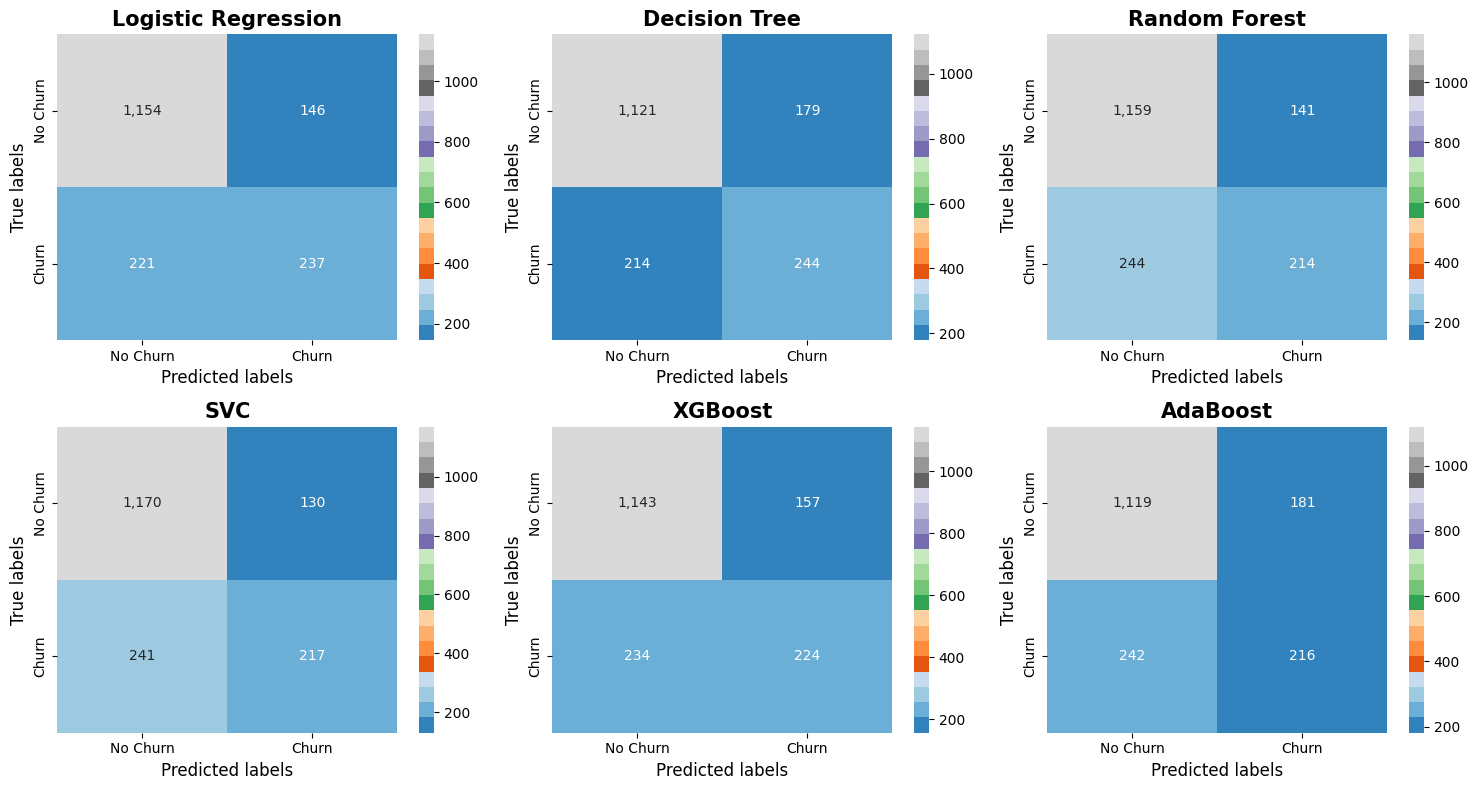

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 3]})

models = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_svc, y_pred_xgb, y_pred_adb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost', 'AdaBoost']
for ax, y_pred, name in zip(axes.flat, models, model_names):
    plot_confusion_matrix(y_test, y_pred, ax, name)

plt.tight_layout()
plt.show()


<hr>

<a id = 7></a>
# Model Refinement

This is the final step in the model building process. Here we will try to improve the performance of the model by tuning some parameters.

- In this step, we have used randomforest classifier to improve the performance of the model and to fit better in the model. We have used the following parameters to tune the model:<br>
1. **class_weight**: this is set to 'balanced_subsample', which means that each class is given equal weight during training, and the subsamples are balanced to help address class imbalance.<br>
2. **n_estimators**: Here, the model is trained on 150 decision trees which allows to make more decision tree to reduce the variance

In [51]:
# Train and evaluate a random forest model
rf = RandomForestClassifier(class_weight = 'balanced_subsample', n_estimators=150, max_depth=6)
rf.fit(X_train, y_train)
print("Random Forest:")
print(rf.score(X_train, y_train))
y_pred_rf = rf.predict(X_test)
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
0.7766401213500189


In [52]:
# Train and evaluate an XGBoost model
xgb = XGBClassifier(n_estimators=500, eta=0.01, subsample=0.5, colsample_bytree=0.5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:")
print(xgb.score(X_train, y_train))
# print(classification_report(y_test, y_pred_xgb))
# print(confusion_matrix(y_test, y_pred_xgb))

XGBoost:
0.8471748198710656


- Use of a logistic regression base classifier with customized parameters and the AdaBoostClassifier

In [53]:
# Train and evaluate an AdaBoost model
# tr= DecisionTreeClassifier(max_depth=5, class_weight='balanced')
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
adb = AdaBoostClassifier(estimator=logreg, n_estimators=100, learning_rate=0.13)
adb.fit(X_train, y_train)
print("AdaBoost:")
print(adb.score(X_train, y_train))
y_pred_adb = adb.predict(X_test)
# print(classification_report(y_test, y_pred_adb))
# print(confusion_matrix(y_test, y_pred_adb))

AdaBoost:
0.7952218430034129


In [54]:
vclf = VotingClassifier(estimators=[('RF', rf), ('XGB', xgb), ('ADB', adb)],
                        voting='soft', weights=[1,3,3])

vclf.fit(X_train, y_train)
y_pred_vclf = vclf.predict(X_test)
print("Voting Classifier:")
print(vclf.score(X_train, y_train))
# print(classification_report(y_test, y_pred_vclf))
# print(confusion_matrix(y_test, y_pred_vclf))

Voting Classifier:
0.8395904436860068


In [55]:
models = [lr, dt, rf, svc, xgb, adb, vclf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'Voting Classifier']
model_performance_new = get_df(models,model_names)

In [56]:
# this is the code part for the linear regression and the gradient descent 
# implementation part for this. Also this can be used to decrease the total calculation needed
# for the proper working. Also we can use vectorization which is pretty helpful in decreasing the
# execution time for larger datasets like stock market prediction.

In [57]:
model_performance_new.head(7)

,Train Accuracy,Test Accuracy,ROC Area,Precision,Recall,F1-score
Model,,,,,,
Logistic Regression,0.805840,0.791240,0.834101,0.618799,0.517467,0.563615
Decision Tree,0.831248,0.776451,0.801241,0.576832,0.532751,0.553916
Random Forest,0.776640,0.739477,0.832517,0.500000,0.777293,0.608547
SVM,0.818733,0.788965,0.790128,0.625360,0.473799,0.539130
XGBoost,0.847175,0.798066,0.834095,0.647564,0.493450,0.560099
AdaBoost,0.795222,0.786121,0.825076,0.624242,0.449782,0.522843
Voting Classifier,0.839590,0.795222,0.835749,0.617788,0.561135,0.588101


So here we see that the train and test accuracy of the models are now closer and there is a slight increase in test accuracy.